# CS 273A Homework 3
by Marzhan Bekbalanova

# Problem 1: Logistic Regression (75+10 points)

1. Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly
separable while the other is not. (5 points)

In [1]:
import numpy as np 
import mltools as ml
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

Text(0.5, 1.0, 'class 0 vs class 1')

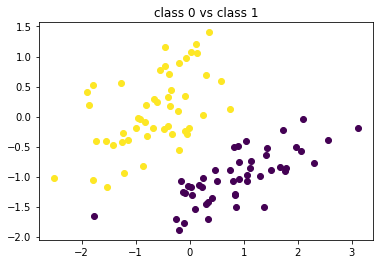

In [3]:
ml.plotClassify2D(None,XA,YA)
plt.title("class 0 vs class 1")

Text(0.5, 1.0, 'class 1 vs class 2')

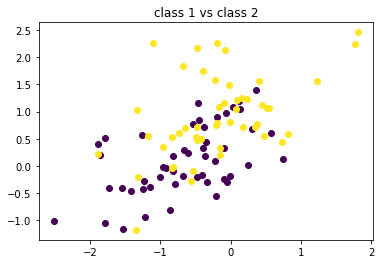

In [4]:
ml.plotClassify2D(None,XB,YB)
plt.title("class 1 vs class 2")

2. Write (fill in) the function plotBoundary in logisticClassify2.py to compute the points
on the decision boundary. In particular, you only need to make sure x2b is set correctly using
self.theta. This will plot the data & boundary quickly, which is useful for visualizing the model
during training. To demo your function plot the decision boundary corresponding to the classifier

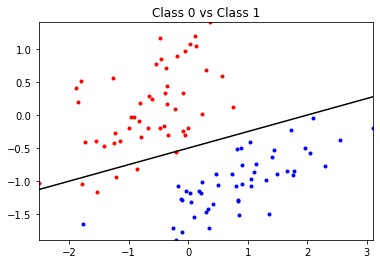

In [5]:
import mltools as ml
from logisticClassify2 import *
learnerA = logisticClassify2();
learnerA.classes = np.unique(YA)
wts = np.array([0.5,-0.25,1])
learnerA.theta = wts

plt.title("Class 0 vs Class 1")
learnerA.plotBoundary(XA,YA)
plt.show()

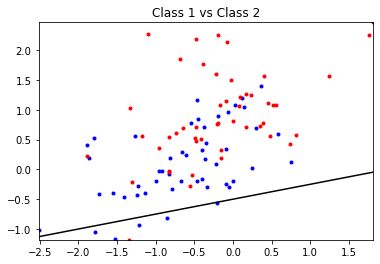

In [6]:
learnerB= logisticClassify2();
learnerB.classes = np.unique(YB)
wts = np.array([0.5,-0.25,1])
learnerB.theta = wts

plt.title("Class 1 vs Class 2")
learnerB.plotBoundary(XB,YB)
plt.show()

3. Complete the logisticClassify2.predict function to make predictions for your classifier.
Verify that your function works by computing & reporting the error rate of the classifier in the previous
part on both data sets A and B. (The error rate on one should be ≈ 0.0505, and higher on the other.)
Note that, in the code, the two classes are stored in the variable self.classes, with the first entry
being the “negative” class (or class 0), and the second entry being the “positive” class, so you want to
have different learner objects for each dataset, and you use learner.err directly.
Include the function definition and the two computed errors. (10 points)

In [12]:
errTrainA = learnerA.err(XA,YA)
errTrainB = learnerB.err(XB,YB)
print("Error Rate for data set A: "+str(errTrainA))
print("Error Rate for data set B: "+str(errTrainB))

Error Rate for data set A: 0.050505050505050504
Error Rate for data set B: 0.46464646464646464


4. Verify that your predict code matches your boundary plot by using plotClassify2D with your
manually constructed learner on the two data sets. This will call predict on a dense grid of points,
and you should find that the resulting decision boundary matches the one you computed analytically.
(5 points)

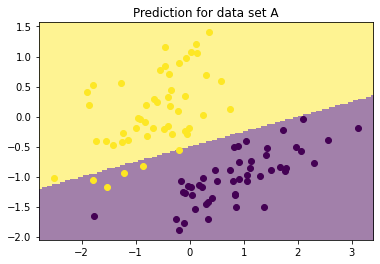

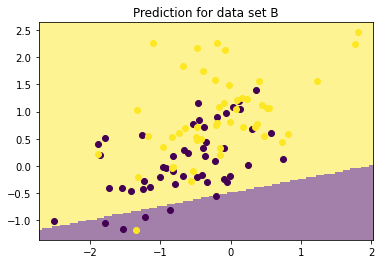

In [13]:
plt.title("Prediction for data set A")
ml.plotClassify2D(learnerA,XA,YA)
plt.show()

plt.title("Prediction for data set B")
ml.plotClassify2D(learnerB,XB,YB)
plt.show()

5. In the provided code, we first transform the classes in the data Y into Y Y , with canonical labels for
the two classes: “class 0” (negative) and “class 1” (positive).Provide the gradient equations for

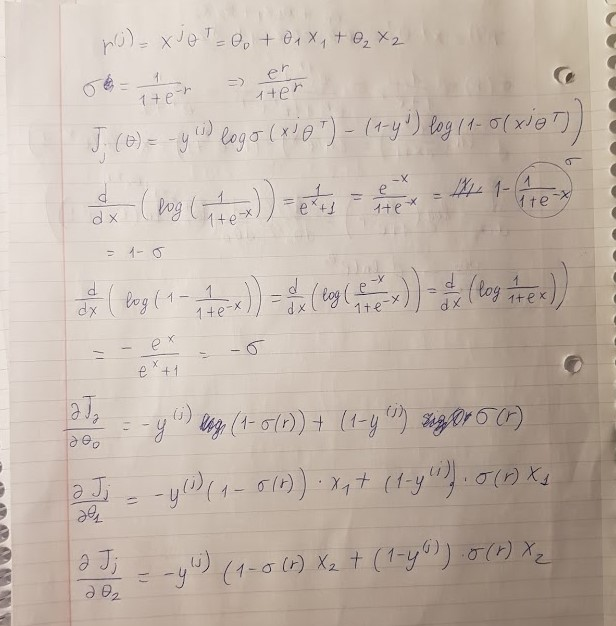

In [11]:
from IPython.display import Image
Image(filename='hw3.jpg')

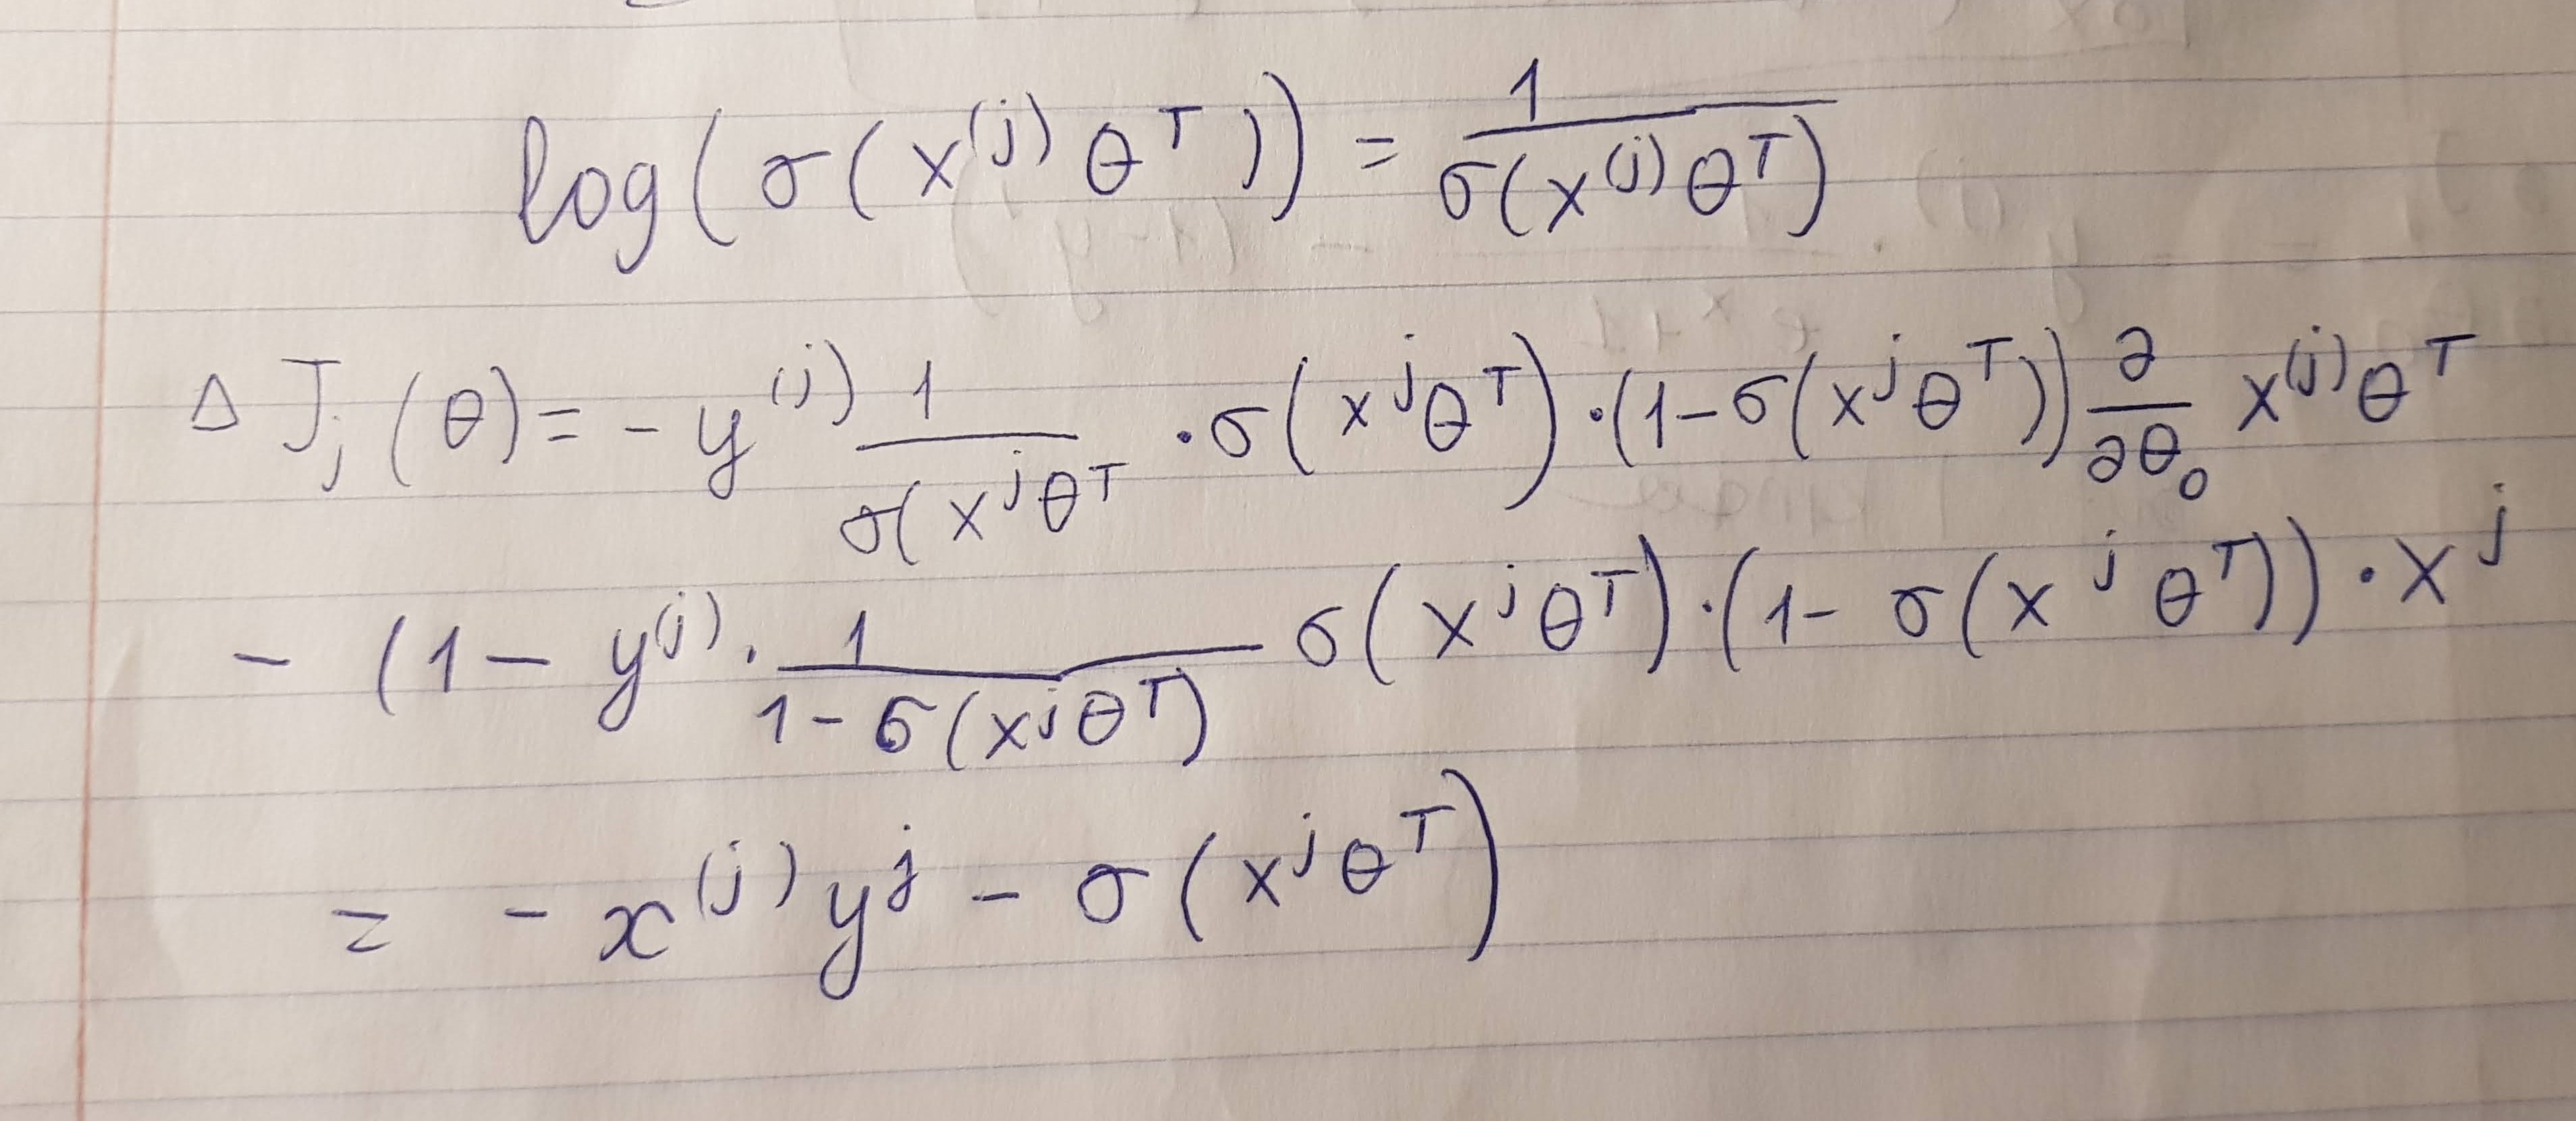

In [14]:
from IPython.display import Image
Image(filename='hw32.jpg')
#derivative of log:

6. Complete train function to perform stochastic gradient descent on the logistic loss function. This
will require that you fill in:
    *(1) computing the surrogate loss function at each epoch  from the previous part);
    *(2) computing the response and gradient associated with each data point x
    *(3) a stopping criterion consisting of two conditions (stop when either you have reached stopEpochs
epochs or J has not changed by more than stopTol since the last epoch).
Include the complete implementation of train. (25 points)

7. Run train for your logistic regression classifier on both data sets (A and B). Describe your parameter
choices for each dataset (stepsize, etc.) and include plots showing the convergence of the surrogate
loss and error rate (e.g., the loss values as a function of epoch during gradient descent), and the final
converged classifier with the data (the included train function does that for you already). (10 points

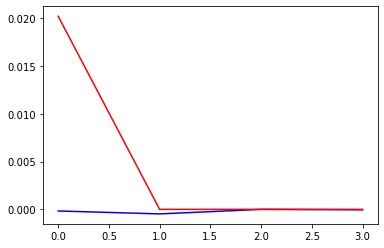

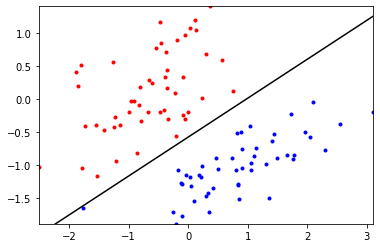

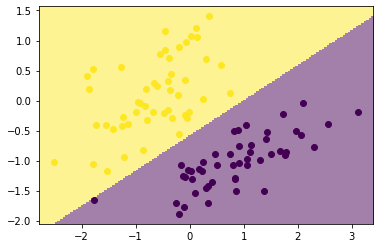

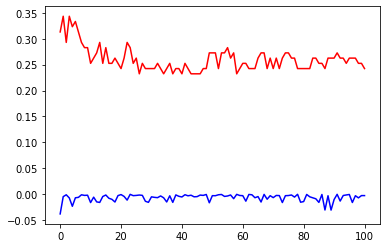

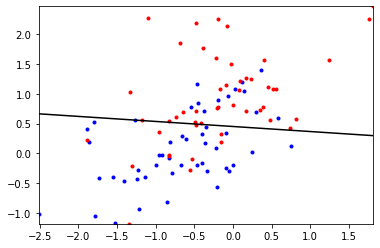

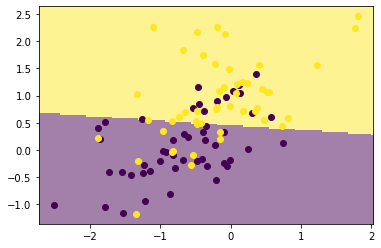

In [8]:
learnerA2 = logisticClassify2(XA,YA);
ml.plotClassify2D(learnerA2,XA,YA)  
plt.show()

learnerB2 = logisticClassify2(XB,YB)
ml.plotClassify2D(learnerB2,XB,YB)
plt.show()

The parameters were stepsize = initStep*2.0/(2.0+epoch), and i picked them for both datasets as it is small enough to make consistent progress

# Problem 2: Shattering and VC Dimension (20 points)

1. T(a+bx1) is a line
 - A can be shattered by this classifier as one point can be on the each side of the line and labeled -1 or 1
 - B can be shattered by this classifier as the two points can be on each side of the line or on the same side and labeled -1 or 1. 2 is the maximum number of points it can shatter
 - C cannot be shattered because two points might be in the same label and the third one the other side
 - D cannot be shattered as the 2 or more points might end up in the same region

2. T( (a ∗ b)x1 + (c/a)x2 ) is a line
 - A can be shattered by this classifier as one point can be on the each side of the line and labeled -1 or 1
 - B can be shattered by this classifier as the two points can be on each side of the line or on the same side and labeled -1 or 1. 2 is the maximum number of points it can shatter
 - C cannot be shattered because two points might be in the same label and the third one the other side
 - D cannot be shattered as the 2 or even more points might end up in the same class


3. T((x1-a)^2 + (x2-b)^2+c) = circle with the center located at [a,b]
 - A can be shattered by this classifier as one point can be inside or outside the circle and labeled -1 or 1
 - B can shattered by this classifier as the two points can be inside or outside the circle and labeled -1 or 1. also we can change the radius and the center location of the circle to get any kind of combination of classification. 
 - C can be shattered because have inside or outside the circle each point and label them and this is the max number
 - D cannot be shattered as the different value points might end up in the same side of the cirlce


4. T( a + bx1 + cx2 ) × T( d + bx1 + cx2 ) - 2 parallel lines
 - A can be shattered by this classifier as one point can be inside or outside the lines and labeled -1 or 1
 - B can be shattered by this classifier as the two points can be inside or outside the lines and labeled -1 or 1
 - C can be shattered because we can have up to different 3 regions where we can classify 3 points. if 2 points are in the same class, we make a=d and if we want all three points in the same class we can move them to either side of the line (when a=d)
 - D cannot be shattered as the 2 points might end up in the same region. (3 points is the the max the classifier can shatter, as it can have up to 3 regions divided)

# Statement of Collaboration (5 points)

I, Bekbalanova Marzhan have not collaborated with anyone. 